# Engenharia de Atritutos (_Feature Engneering_)
- Data: 18/11/2025
- Aluno: Waldemir

## Conceito Geral de Engenharia de Atributos
Engenharia de Atributos (Feature Engineering) é o processo de criar, selecionar e transformar as variáveis chamadas de "atributos" +" ou "features" 
que você usa para treinar um modelo de machine learning.

Pense nisso como: os dados brutos são os ingredientes, e a engenharia de atributos é a forma como você os corta, tempera e combina para criar um prato saboroso.
Um bom cozinheiro (cientista de dados) transforma ingredientes comuns em uma refeição extraordinária.

In [1]:

import scipy.stats as stats # Biblioteca para coletar estatísticas
import numpy as np # Biblioteca para trabalhar a computação científica
import pandas as pd # Biblioteca para trabalhar com biblioteca de dados
import matplotlib.pyplot as plt # Biblioteca para visualização de dados
import seaborn as sns # Biblioteca para visualização de dados

# Dados Experimentais

In [2]:
#Lê e carrega dados em memória
url_dados = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
colunas = ['age','workclass', 'fnlwgt','education', 'education-num', 
           'marital-status', 'occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

dados = pd.read_csv(url_dados, header=None, sep=',', na_values=[' ?','?','? '], names=colunas)

In [3]:
#Exibir as primeiras linhas do conjunto de dados
dados.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Exibe informções sobre o conjunto de daos carregado
#observamos: Volume de dados, nomes das colunas, tipos de daos e dados faltantes
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Eliminação de Atributos

In [5]:
# Remove o atributo fnlwgt
dados.drop('fnlwgt', axis=1, inplace=True)

#remove o atributo relationship
#dados2 = dados.drop('relationship', axis=1, inplace=False)

In [6]:
dados.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Tratamento de dados desbalaneados

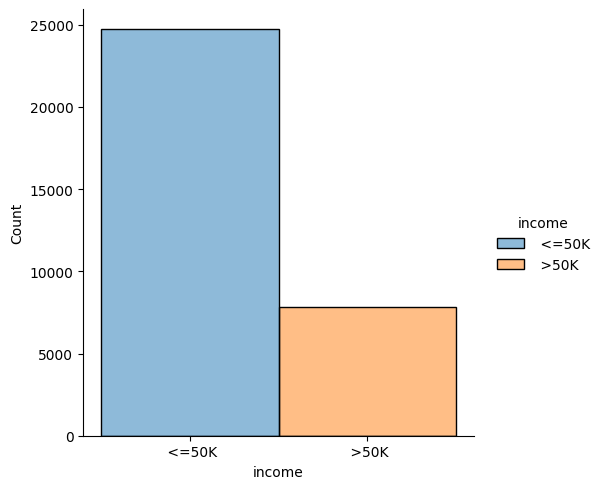

In [7]:
#Plota a distribuição de classes
sns.displot(dados, x="income", hue="income")
plt.show()

In [8]:
#divide o conjunto de dados pelas duas classes
class_menor50 = dados[dados['income'] == ' <=50K']
class_maior50 = dados[dados['income'] == ' >50K']

#Exibe a quantidade de dados por classe
print("<=50K:",len(class_menor50))
print(">50K:",len(class_maior50))

<=50K: 24720
>50K: 7841


In [9]:
#Equilibra a classe majoritária (<=50)
#conforme o tamanho da classe minoritária

nova_class_menor50 = class_menor50.sample(len(class_maior50))
novos_dados = pd.concat([nova_class_menor50, class_maior50], axis=0)
novos_dados.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27102,55,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
22778,27,Private,Some-college,10,Divorced,Craft-repair,Unmarried,White,Female,0,0,40,United-States,<=50K
4069,25,Private,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,22,United-States,<=50K
28422,39,Private,HS-grad,9,Divorced,Other-service,Not-in-family,Other,Female,0,0,40,Dominican-Republic,<=50K
24331,29,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K


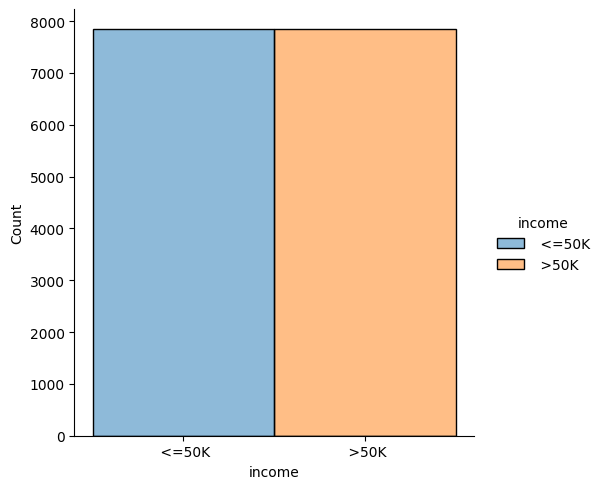

In [10]:
#Plota a nova distribuiçã de classes
sns.displot(novos_dados, x="income", hue="income")
plt.show()

# Tratamento de dados ruidodos

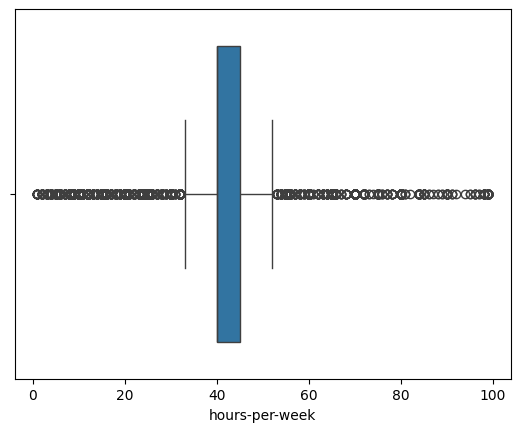

In [11]:
# Identificando o ruído no atributo 'hour-per-week'
sns.boxplot(data=dados, x="hours-per-week")
plt.show()

In [13]:
# Identifica os Objetos ruidodos no conjunto de dados
x = stats.zscore(dados['hours-per-week'])
print("Ruídos: ", len(dados[np.abs(x) > 3]))

Ruídos:  440


In [14]:
# Substitui o valor ruidodo pelo valor médio do atributo
dados.loc[np.abs(3) > 3, 'hours-per-week'] = int(np.mean(dados['hours-per-week']))

# Transformação de um valor simbólico nominal para numérico

In [15]:
# Transforma os valores nominais do 
# atributo binário 'income' em valores numéricos
dados['income-num'] = dados['income'].map({" <=50K":0, " >50K":1})
dados.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income-num
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0.0
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0.0
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.0
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0.0
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0.0
5,37.0,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K,0.0
6,49.0,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K,0.0
7,52.0,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K,1.0
8,31.0,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K,1.0
9,42.0,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K,1.0


In [16]:
trans_dados = pd.get_dummies(dados[['race']])
trans_dados = pd.concat([dados['race'], trans_dados], axis=1)
trans_dados.head()

,race,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,White,False,False,False,False,True
1,White,False,False,False,False,True
2,White,False,False,False,False,True
3,Black,False,False,True,False,False
4,Black,False,False,True,False,False


# Transformação de um valor numerico para simbólico

In [17]:
# Transforma os valores numéricos do 
# atributo 'education-num' em valores nominais
dados['education-num-nominal'] = dados['education-num'].map({
    1  : ' Preschool',
    2  : ' 1st-4th',
    3  : ' 5th-6th',
    4  : ' 7th-8th',
    5  : ' 9th',
    6  : ' 10th',
    7  : ' 11th',
    8  : ' 12th',
    9  : ' HS-grad',
    10 : ' Some-college',
    11 : ' Assoc-acdm',
    12 : ' Assoc-voc',
    13 : ' Bachelors',
    14 : ' Masters',
    15 : ' Prof-school',
    16 : ' Doctorate'})

In [19]:
dados[['education', 'education-num', 'education-num-nominal']].head()

,education,education-num,education-num-nominal
0,Bachelors,13.0,Bachelors
1,Bachelors,13.0,Bachelors
2,HS-grad,9.0,HS-grad
3,11th,7.0,11th
4,Bachelors,13.0,Bachelors
